# Data Analysis || NLP || Data Visualization

On the tweets dataset uploaded along with  this notebook, we analyse the data and answer a few questions based on it. <br>
Analysis includes: <p>
    >Which gender makes more typos (Click [here](#1) for the answer) <br>
    >Common words used by both gender (Click [here](#2) for the answer)

**Analysing which gender makes more typos**

In [1]:
#Importing libraries

import pandas as pd
import numpy as np

#Reading csv

df=pd.read_csv("Information.csv", encoding = "ISO-8859-1", index_col=0)
df.head(3)

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade


In [2]:
df1=df[["text", "gender" ]] #Columns of interest with target variable
df1.info() #its found there are missing values in gender
df1['gender'].unique() #it's found there are uknown/other genders in the target column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 815719226 to 815757985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20050 non-null  object
 1   gender  19953 non-null  object
dtypes: object(2)
memory usage: 469.9+ KB


array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

**Data Cleaning**

In [3]:
df1['gender'].replace('brand', np.nan, inplace=True) #replaces with np.nan
df1['gender'].replace('unknown', np.nan, inplace=True) #replaces with np.nan
df1['gender'].unique()
df1=df1.dropna() #dropping np.nan values
df1.info(()) #now there is no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12894 entries, 815719226 to 815757985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12894 non-null  object
 1   gender  12894 non-null  object
dtypes: object(2)
memory usage: 302.2+ KB


C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### To check for typos

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.corpus import names #To not include common names as typos
from nltk.corpus import brown #another list of common words

##Conversion
list_of_stopwords=list(stopwords.words('english')) #stopwords
word_list = words.words()
brownlist = brown.words()
word_set = set(brownlist)

#"James" in set(names.words())


In [5]:
#Iterating through the rows to obtain a new column "Typos" that contains either 1 or 0, depending on the presence or absence of
#typos: 1 means there is a typo and 0 implies there is no typo
typos=[]
for i in range(df1.shape[0]):
    current_text=df['text'].values[i]
    tokenized_words=word_tokenize(current_text)
    
    tokenized_words = [word for word in tokenized_words if word.isalpha()]
    
    
    
    clean_words=''
    for word in tokenized_words:
        
        if word not in set(names.words()) not in set(list_of_stopwords) and word.startswith("//")==False and word.startswith("https")==False and word not in word_set and word.startswith("#")==False and word.startswith("@")==False:
            clean_words = 1
        else:
            clean_words= 0
    typos.append(clean_words)


In [6]:

#Adding typo column to the sub dataset
df1["typos"]=typos

df1['typos'].replace('', 0, inplace=True)
##2 blank values were manually checked and changed to 0 (ie no typo) 

df1.head()

,text,gender,typos
_unit_id,,,
815719226,Robbie E Responds To Critics After Win Against...,male,0
815719227,ÛÏIt felt like they were my friends and I was...,male,0
815719228,i absolutely adore when louis starts the songs...,male,0
815719229,Hi @JordanSpieth - Looking at the url - do you...,male,0
815719230,Watching Neighbours on Sky+ catching up with t...,female,1


**Data Visualization using Plots**

In [7]:
df1.groupby('gender')["typos"].sum() #Shows sum of typos by gender. Found that number of typos for female>male

gender
female    1244
male      1192
Name: typos, dtype: int64

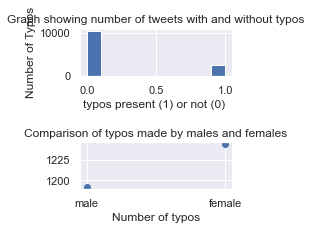

In [20]:
x=["male", "female"]
y=[1192, 1244]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.subplot(4,2,1)
_=plt.hist(df1["typos"])
_=plt.xlabel("typos present (1) or not (0) ")
_=plt.ylabel("Number of Typos")
plt.title("Graph showing number of tweets with and without typos")

plt.subplot(4,2,5)
plt.scatter(x, y)
plt.xlabel("Gender")
plt.xlabel("Number of typos")
plt.title("Comparison of typos made by males and females")

plt.show() 


<a id='1'></a>


**Based on graphs, the gender that it more likely to make typos is -Female**

**Analysing the most common emotions/words used by Males and Females**

 Part 1: To find the common words used by MALES

In [11]:
df2=df1.set_index("gender")
dfm=df2.loc[["male"],["text"]] #We subset only those "male" rows
dfm.head()

#from nltk.corpus import stopwords
#list_of_stopwords=list(stopwords.words('english')) #To filter out stopwords from 'text'

from sklearn.feature_extraction.text import TfidfTransformer 
#TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents #For reference
from sklearn.feature_extraction.text import CountVectorizer
#to convert text to a matrix and counts the occurence
cv = CountVectorizer(stop_words=["https", "co", "_ù", 'i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours',
 'yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their',
 'theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have',
 'has',
 'had',
 'having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for',
 'with',
 'about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over',
 'under',
 'again' 'further' 'then','once','here','there','when','where','why','how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"])
listoftext=list(dfm['text'])

word_count_vector=cv.fit_transform(listoftext) #counts every word in listoftext

#compute tf-df--> commonly used words have lower score/ weight
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector) 
 
    
#store the values in a new dataframe dfm_idf
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
df_idf1=df_idf.sort_values(by=['idf_weights'], ascending= True)
#sort the values in ascending order, since commonly used words have lessweight
df_idf1.head(25)

,idf_weights
get,3.932405
like,3.947673
one,4.202069
time,4.328820
new,4.370206
love,4.423230
go,4.428193
people,4.500389
good,4.538541
know,4.544112


**The top 20 most commonly used words my males are listed above**

**Part 2: To find the common words used by FEMALES** <p>
Using similar method 

In [12]:
dff=df2.loc[["female"],["text"]] #We subset only those "female" rows
listoftext=list(dff['text']) #make a list from dff, of text values
word_count_vector=cv.fit_transform(listoftext) #count vectorize the list
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector) #tf-idf transform
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

df_idf2=df_idf.sort_values(by=['idf_weights'], ascending= True)
#sort the values in ascending order, since commonly used words have lessweight
df_idf2.head(25)

,idf_weights
like,3.791419
get,4.001870
one,4.060619
love,4.079912
day,4.140131
go,4.237858
time,4.346180
people,4.402840
know,4.496806
new,4.511695


**The top 20 most commonly used words my males are listed above**

##### Data Visualization using plots

<a id='2'></a>

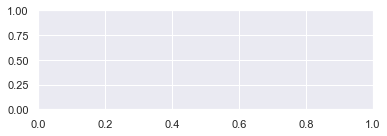

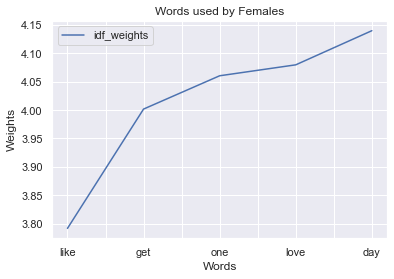

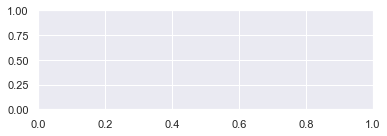

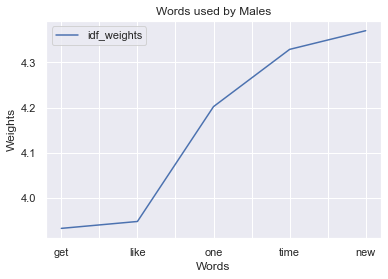

In [16]:
plt.subplot(2,1,1)
df_idf2.iloc[0:5].plot()
plt.title("Words used by Females")
plt.xlabel("Words")
plt.ylabel("Weights")

plt.show()

plt.subplot(2,1,2)
df_idf1.iloc[0:5].plot()
plt.title("Words used by Males")
plt.xlabel("Words")
plt.ylabel("Weights")

plt.show()